In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2022-10-06 18:58:43.423062: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-06 18:58:43.423091: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
mySymbol= "EURUSD_H4.csv"
myDir="./myDataset/{}".format(mySymbol)
df = pd.read_csv(myDir, sep="\t")
df.head()
# df['Time']=pd.to_datetime(df['Time'])

,Time,Open,High,Low,Close,Volume
0,2007-01-01 00:00:00,1.31908,1.31973,1.31872,1.31940,190569
1,2007-01-01 04:00:00,1.31937,1.31985,1.31887,1.31905,185785
2,2007-01-01 08:00:00,1.31916,1.31933,1.31650,1.31682,172124
3,2007-01-01 12:00:00,1.31697,1.31943,1.31657,1.31931,179973
4,2007-01-01 16:00:00,1.31916,1.32095,1.31837,1.31940,1025178


In [3]:
X=tf.convert_to_tensor(df[[ 'Open', 'High', 'Low']])
y=tf.constant(df['Close'])
X_train=X[:3000]
y_train=y[:3000]
X_test=X[3000:3100]
y_test=y[3000:3100]


2022-10-06 18:58:45.496030: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-06 18:58:45.496070: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-06 18:58:45.496094: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (judgementday): /proc/driver/nvidia/version does not exist
2022-10-06 18:58:45.496333: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)])

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
             metrics=['mae'])

model.fit(X_train,y_train, epochs=20)

Epoch 1/20


/home/orglobal/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


94/94 [==============================] - 0s 1ms/step - loss: 1.2188 - mae: 1.2188
Epoch 2/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0552 - mae: 0.0552
Epoch 3/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0456 - mae: 0.0456
Epoch 4/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0385 - mae: 0.0385
Epoch 5/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0296 - mae: 0.0296
Epoch 6/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0182 - mae: 0.0182
Epoch 7/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0110 - mae: 0.0110
Epoch 8/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0057 - mae: 0.0057
Epoch 9/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0052 - mae: 0.0052
Epoch 10/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0047 - mae: 0.0047
Epoch 11/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0041 

In [5]:
y_pred=model.predict(X_test)
# y_pred, y_test

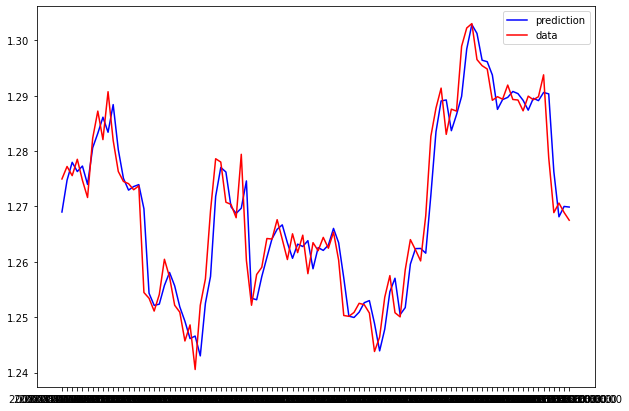

In [6]:
plt.figure(figsize=(10,7))
plt.plot(df['Time'][3000:3100],y_pred,c='b', label='prediction')
plt.plot(df['Time'][3000:3100],y_test,c='r', label='data') 
plt.legend()